# [IAPR][iapr]: Lab 1 ‒  Image segmentation


**Group ID:** 37

**Author 1 (sciper):** Michael Biselx    (283812)  
**Author 2 (sciper):** Bastien Darbellay (288406)   
**Author 3 (sciper):** Maria   Guerraoui (274578)   

**Release date:** 11.03.2022
**Due date:** 25.03.2022 (11:59 pm)


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as
preparation for the final project, which is a practical project which ties together the topics of the course.

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external
functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation
in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook <font color='red'> rerun </font>the notebook from scratch !**
`Kernel` > `Restart & Run All`

We will not rerun the notebook for you.

[iapr]: https://github.com/LTS5/iapr

---
## 0. Extract relevant data
We first need to extract the `lab-01-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-01-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')

if not os.path.exists(tar_path):
    raise Exception('Path to is not valid {}'.format(tar_path))
    
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

---
## Part 1: Brain segmentation

Your goal: compute the size of the brain (without the skull) in pixels in a 2D image of a human head taken by
Magnetic Resonance Imaging (MRI) using:
* Region growing (5 pts)
* Contour detection (5 pts)
* An additional method of your choice (5 pts)

Each section should display the resulting segmentation as well as the size in pixel of the detected region. Comment
each method limitations and/or advantages.

### 1.1 Brain image visualization

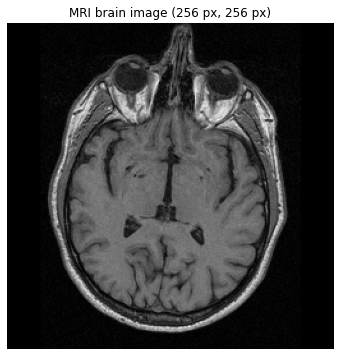

In [2]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

# Load image
data_path = os.path.join(data_base_path, data_folder)
brain_im = skimage.io.imread(os.path.join(data_path, 'brain-slice40.tiff'))
im_h, im_w = brain_im.shape

# Display MRI image
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(brain_im, cmap='gray')
ax.set_title('MRI brain image ({} px, {} px)'.format(im_h, im_w))
ax.axis('off')
plt.show()

### 1.2 Region growing (5pts)

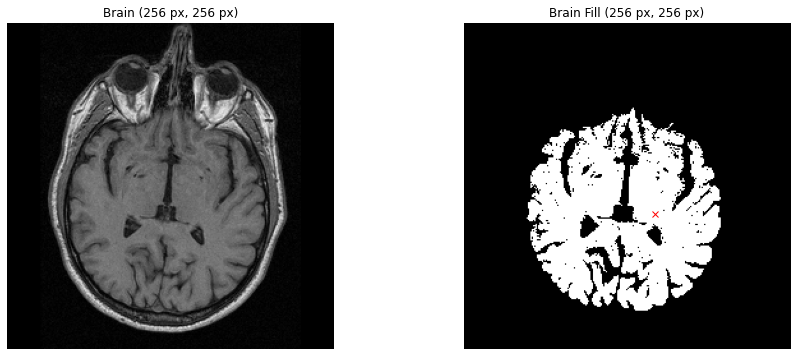

There are 14673 brain pixels of 65536 total pixels in this image (22.39%).


In [3]:
import numpy as np
import skimage.segmentation

# use the existing image segmentation algorithm in skimage
#  this tool extracts all contiguous pixels whose value is 
#  within a certain tolerance of the seed pixel
seed_point = (150, 150)
mask = skimage.segmentation.flood(brain_im, seed_point, tolerance=0.08*brain_im.max()) # heuristic thresholding
#import skimage.morphology
#mask = skimage.morphology.closing(mask, skimage.morphology.disk(1)) 

# display the mask
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].imshow(brain_im,  cmap='gray')
ax[1].imshow(mask, cmap='gray')
ax[1].plot(seed_point[0], seed_point[1], 'rx')
ax[0].set_title('Brain ({} px, {} px)'.format(im_h, im_w))
ax[1].set_title('Brain Fill ({} px, {} px)'.format(im_h, im_w))
for axis in ax : axis.axis('off')
plt.show()

# count the number of brain pixels 
print("There are {} brain pixels of {} total pixels in this image ({:.2f}%).".format(np.sum(mask), im_h*im_w, 100*np.sum(mask)/(im_h*im_w)))

# the function skimage.morphology.closing(mask, footprint=skimage.morphology.disk(1)) can be used to close the 
# small holes in the detected brain area. however, as the exercise is to use region growing, not morphology.

### 1.3 Contour detection (5pts)

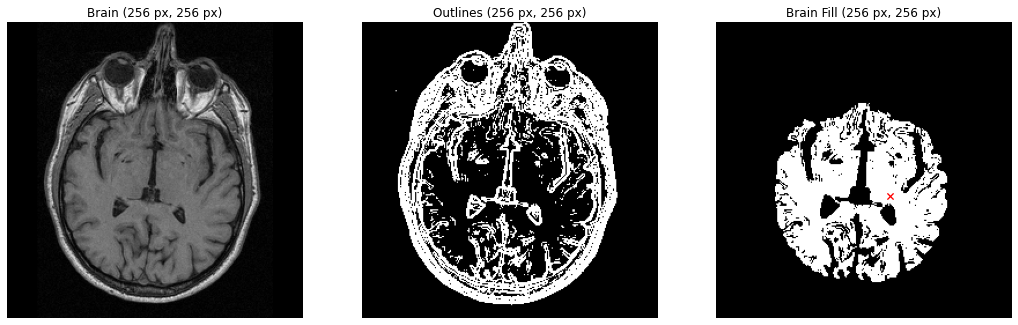

There are 13165 brain pixels of 65536 total pixels in this image (20.09%).


In [4]:
# Add your implementation and discussion
import skimage.measure
import skimage.filters

edges_sobl = skimage.filters.sobel(brain_im)
edges_edg  = (edges_sobl > (0.09*edges_sobl.max())).astype(int); # heuristic thresholding again
mask       = skimage.segmentation.flood(edges_edg, seed_point, tolerance=0) 
#import skimage.morphology
#mask = skimage.morphology.closing(mask, skimage.morphology.disk(2)) 

fig, ax = plt.subplots(1, 3, figsize=(18, 8))
ax[0].imshow(brain_im,  cmap='gray')
ax[1].imshow(edges_edg, cmap='gray')
ax[2].imshow(mask, cmap='gray')
ax[2].plot(seed_point[0], seed_point[1], 'rx')
ax[0].set_title('Brain ({} px, {} px)'.format(im_h, im_w))
ax[1].set_title('Outlines ({} px, {} px)'.format(im_h, im_w))
ax[2].set_title('Brain Fill ({} px, {} px)'.format(im_h, im_w))
ax[2].plot(seed_point[0], seed_point[1], 'rx')
for axis in ax : axis.axis('off')
plt.show()

# count the number of brain pixels 
print("There are {} brain pixels of {} total pixels in this image ({:.2f}%).".format(np.sum(mask), im_h*im_w, 100*np.sum(mask)/(im_h*im_w)))

# the function skimage.morphology.closing(mask, footprint=skimage.morphology.disk(2)) can be used to close the 
# small holes in the detected brain area. however, as the exercise is to use contour detection, not morphology.

### 1.4 Additional method (5pts)

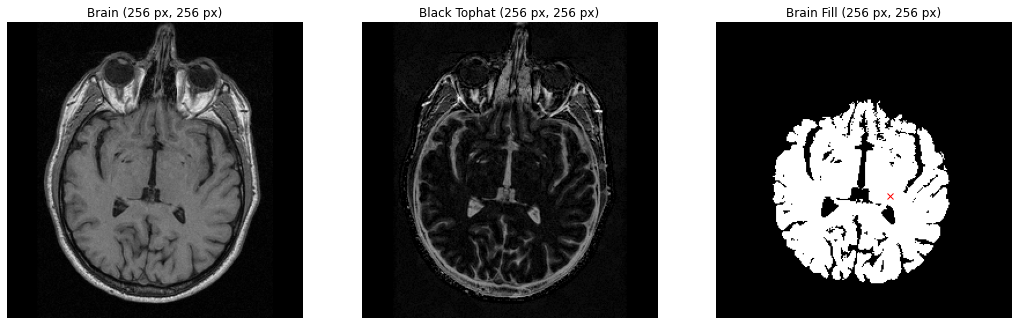

There are 15676 brain pixels of 65536 total pixels in this image (23.92%).


In [5]:
import skimage.morphology
# Add your implementation and discussion

footprint = skimage.morphology.disk(7)                           # we're working with rounded shapes - use the disk
blk_tphat = skimage.morphology.black_tophat(brain_im, footprint) # use black tophat morphology to separate the lighter brain from the surrounding darker dura mater
mask      = skimage.segmentation.flood(blk_tphat, seed_point, tolerance=0.09*blk_tphat.max()) # heuristic thresholding for the third time


# display the mask
fig, ax = plt.subplots(1, 3, figsize=(18, 8))
ax[0].imshow(brain_im,  cmap='gray')
ax[1].imshow(blk_tphat, cmap='gray')
ax[2].imshow(mask, cmap='gray')
ax[2].plot(seed_point[0], seed_point[1], 'rx')
ax[0].set_title('Brain ({} px, {} px)'.format(im_h, im_w))
ax[1].set_title('Black Tophat ({} px, {} px)'.format(im_h, im_w))
ax[2].set_title('Brain Fill ({} px, {} px)'.format(im_h, im_w))
for axis in ax : axis.axis('off')
plt.show()

# count the number of brain pixels 
print("There are {} brain pixels of {} total pixels in this image ({:.2f}%).".format(np.sum(mask), im_h*im_w, 100*np.sum(mask)/(im_h*im_w)))


---
## Part 2: Shape/color segmentation

You will find hereafter three pictures taken under three different illuminations, containing some shapes with different
colors. We ask you to create a routine to:

1. Count the number of shapes of each color (5pts).
2. Compute the total area (in pixels) of each color (5pts).

Please note that one specific challenge is to be robust to illumination changes. Therefore some kind of intensity
normalization should probably be used.

hint: RGB color space might not be optimal. Consider using HSV or LAB color space.

### 2.1 Visualization

In [6]:
# Load images
im_names = ['arena-shapes-01', 'arena-shapes-02', 'arena-shapes-03']
filenames = [os.path.join(data_path, name) + '.png' for name in im_names]
ic = skimage.io.imread_collection(filenames)
images = skimage.io.concatenate_images(ic)
print('Number of images: ', images.shape[0])
print('Image size: {}, {} '.format(images.shape[1], images.shape[2]))
print('Number of color channels: ', images.shape[-1])

Number of images:  3
Image size: 480, 640 
Number of color channels:  3


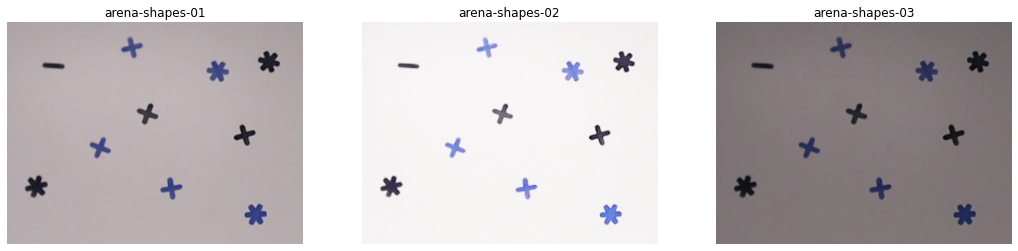

In [7]:
# Plot images
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, im, nm in zip(axes.ravel(), images, im_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)
plt.show()

### 2.2 Number of shapes of each color (5 pts)

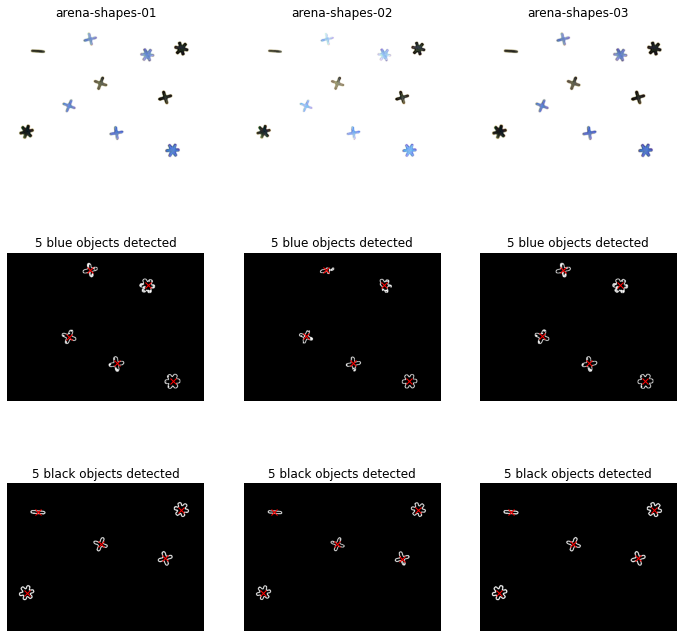

In [8]:
import skimage.filters
import skimage.color
# Add your implementation and discussion


def equalize_img(img) : 
    img_cp = img.copy()
    mask = np.full(img.shape[0:2], False)
    for c in range(0,3) :     # find the background (assumption: the background is uniform, bright and makes up a large portion of the image)
        thresh = skimage.filters.threshold_otsu(img[:,:,c])
        mask = np.logical_or(mask, np.logical_and(img[:,:,c] > 0, img[:,:,c] < thresh))
        
    for c in range(0,3) :     # use histogram manipulations to make the images a little more similar (assumption: this is not a bad idea)
        plow, phigh = np.percentile(img[mask,c], (2, 99))
        img_cp[mask,c] = skimage.exposure.rescale_intensity(img[mask,c], (plow, phigh))
        
    img_cp[np.logical_not(mask)] = 255;     # for fun: make the background a uniform white 
    
    return img_cp, mask

def find_obj(img) :
    # detect gradient  
    edges_sobl = skimage.filters.sobel(img);            # the 200 IQ move here is that sobel also calculates the color gradient ??? 
    edges_gray = skimage.color.rgb2gray(edges_sobl)     # so, for the black/gray objects, there is no color gradient and they show up as outlines
    thresh = skimage.filters.threshold_otsu(edges_gray) # however, the blue objects have a color gradient -> they show up as full forms!!
    edges_bin  = (edges_gray > thresh).astype(int)      # binarize for simplicity
    
    # count black obj
    centr_blck = []
    edges_blck = skimage.morphology.white_tophat(edges_bin, skimage.morphology.disk(3)) # since black objects are thin bright lines, they are perfect for detection via white_top hat
    edges_blck = skimage.morphology.area_opening(edges_blck, area_threshold=200)        # small spots need to be cleaned up
    props_blck = skimage.measure.regionprops(skimage.measure.label(edges_blck, background=0)) # use skimage magic to label all contiguous regions in the image, and then to extract the properties of these regions 
    for lbl in props_blck : centr_blck.append(lbl["centroid"])                          # get the centroids of each region (this is important for later)

    #count blue objects
    centr_blue = []
    objct_blue = edges_bin - edges_blck;                # when the black objects are removed, only the blue remain
    objct_blue = skimage.morphology.area_opening(objct_blue, area_threshold=200)        # repeat the same procedure as above 
    props_blue = skimage.measure.regionprops(skimage.measure.label(objct_blue, background=0))
    for lbl in props_blue :  centr_blue.append(lbl["centroid"])
    edges_blue = skimage.filters.sobel(objct_blue);     # for aesthetics, get the edges of the objects rather than objects
    edges_blue = (edges_blue > .2*edges_blue.max()).astype(int)
   
    return edges_blue, centr_blue, edges_blck, centr_blck    
    
    
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for im, nm, i in zip(images, im_names, range(0,len(im_names))):
    img_eq,_ = equalize_img(im)
    edges_blue, centr_blue, edges_blck, centr_blck = find_obj(img_eq)
    
    axes[0,i].imshow(img_eq)                  # show equalized img
    axes[0,i].set_title(nm)
    
    axes[1,i].imshow(edges_blue, cmap='gray') # show blue shapes 
    for p in centr_blue : axes[1,i].plot(p[1], p[0], 'rx')
    axes[1,i].set_title("{} blue objects detected".format(len(centr_blue)))

    axes[2,i].imshow(edges_blck, cmap='gray') # show black shapes 
    for p in centr_blck : axes[2,i].plot(p[1], p[0], 'rx')
    axes[2,i].set_title("{} black objects detected".format(len(centr_blck)))
    

for ax in axes.ravel(): ax.axis('off')    
plt.show() 

### 2.3 Total area (in pixels) of each color (5 pts)

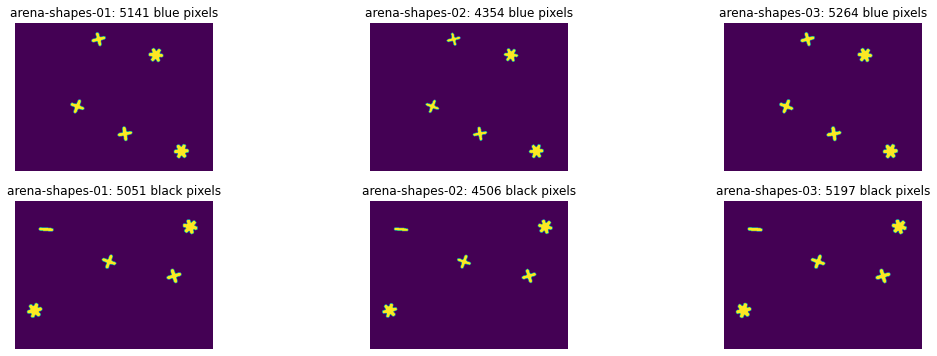

In [10]:
# Add your implementation and discussion

def multiflood(mask, points, tolerance=0) : 
    # apply skimage.segmentation.flood() at multiple seed points  
    mask_c = np.full(mask.shape, 0)
    for point in points :  
        mask_c = mask_c + skimage.segmentation.flood(mask.astype(int), (int(point[0]), int(point[1])), tolerance=tolerance)
    return mask_c


# do the thing, using the previously defined functions 
fig, axes = plt.subplots(2, 3, figsize=(18, 6))
for im, nm, i in zip(images, im_names, range(0,len(im_names))):
    img_eq, mask = equalize_img(im)
    edges_blue, centr_blue, edges_blck, centr_blck = find_obj(img_eq)
    blue_pxls = multiflood(mask, centr_blue) # flood the image at the centers of the blue objects 
    blck_pxls = multiflood(mask, centr_blck) # idem for the black objects 
    
    axes[0,i].imshow(blue_pxls)
    axes[0,i].set_title(str(nm) + ": {} blue pixels".format(np.sum(blue_pxls)))
    
    axes[1,i].imshow(blck_pxls)
    axes[1,i].set_title(str(nm) + ": {} black pixels".format(np.sum(blck_pxls)))
    
for ax in axes.ravel(): ax.axis('off')
plt.show()
